# Text guided Image Demonstration

In [1]:
# install
!pip install -q diffusers transformers accelerate

In [2]:
# import
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
# load the Stable Diffusion image-to-image pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# load and preprocess an example image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

In [5]:
# define your prompt
prompt = "A painting of a cat in the style of Van Gogh"

In [6]:
# run inference
with torch.autocast("cuda"):
    result = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5)

  0%|          | 0/37 [00:00<?, ?it/s]

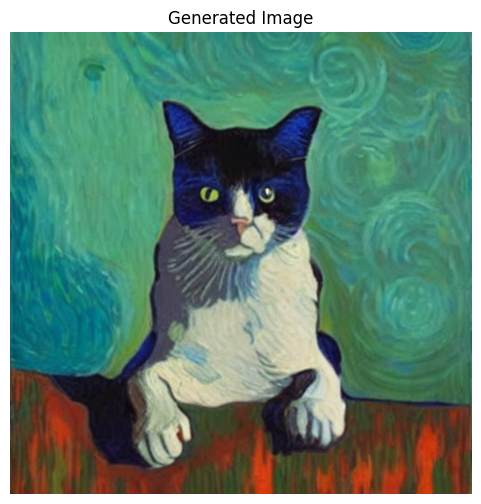

In [7]:
# display the generated image inline
generated_image = result.images[0]
plt.figure(figsize=(6, 6))
plt.imshow(generated_image)
plt.axis("off")
plt.title("Generated Image")
plt.show()